In [2]:
transform = transforms.ToTensor()

In [5]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets,transforms
from torchvision.utils import make_grid
device = torch.device("mps")

ModuleNotFoundError: No module named 'torch'

In [3]:
train_data = datasets.MNIST(root='../Data',download=True,train=True,transform=transform)
test_data = datasets.MNIST(root='../Data',download=True,train=False,transform=transform)

In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_batch_size = 16
test_batch_size= 16
train_loader = DataLoader(train_data,train_batch_size,shuffle=True)
test_loader = DataLoader(test_data,test_batch_size,shuffle=False)

### demo

In [7]:
#we have greyscale image so incoming channels is 1, we wnat to apply 6 filters,kernel size =3x3 stride =1
conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)

In [8]:
#image -> conv1 -> pooling -> conv2 (number of channels remain same after pooling unless its 1x1)
conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1)

In [9]:
for i,(X_train,y_train) in enumerate(train_data):
    break

In [10]:
X_train.shape #--> convert into batch

torch.Size([1, 28, 28])

In [11]:
x = X_train.view(1,1,28,28)

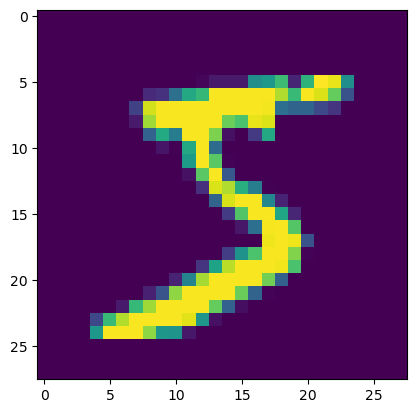

In [12]:
plt.imshow(x.reshape(28,28))

In [13]:
x = F.relu(conv1(x))

In [14]:
x.shape

torch.Size([1, 6, 26, 26])

In [15]:
x = F.max_pool2d(x,2,2)

In [16]:
x.shape

torch.Size([1, 6, 13, 13])

In [17]:
x = F.relu(conv2(x))

In [18]:
x.shape

torch.Size([1, 16, 11, 11])

In [19]:
x = F.max_pool2d(x,2,2)

In [20]:
x.shape

torch.Size([1, 16, 5, 5])

In [21]:
x = x.view(-1,400)

In [22]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        #define conv layers and fully connected layers
        #poolin layer are more thought of as activation fn
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(400,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self,x):
        #conv1 -> relu -> maxpool ->conv2 ->relu
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1,400)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [23]:
model = Model()

In [24]:
model = model.to(device)

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
num_epochs = 10

In [26]:
for epoch in range(num_epochs):
    model.train()
    for X_train,y_train in train_loader:
        X_train,y_train = X_train.to(device),y_train.to(device)
        y_pred = model.forward(X_train)
        loss = criterion(y_pred,y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch : {epoch+1} loss : {loss.item()}")

epoch : 1 loss : 0.192082479596138
epoch : 2 loss : 0.012344835326075554
epoch : 3 loss : 0.009030362591147423
epoch : 4 loss : 0.00707484083250165
epoch : 5 loss : 0.0003441894368734211
epoch : 6 loss : 0.0005792047595605254
epoch : 7 loss : 0.0005330300773493946
epoch : 8 loss : 2.7854930522153154e-05
epoch : 9 loss : 0.04714110493659973
epoch : 10 loss : 0.00019305635942146182


In [27]:
all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test,y_test = X_test.to(device),y_test.to(device)
        pred = model(X_test)
        pred = torch.argmax(pred, dim=1)
        
        # Collect predictions and labels
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(y_test.cpu().numpy())

In [28]:
from sklearn.metrics import classification_report
print(classification_report(all_preds,all_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1033
           3       0.99      0.98      0.99      1024
           4       0.99      0.99      0.99       981
           5       0.99      0.98      0.98       901
           6       0.98      0.98      0.98       955
           7       0.98      0.99      0.98      1019
           8       0.99      0.98      0.99       986
           9       0.97      0.99      0.98       990

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



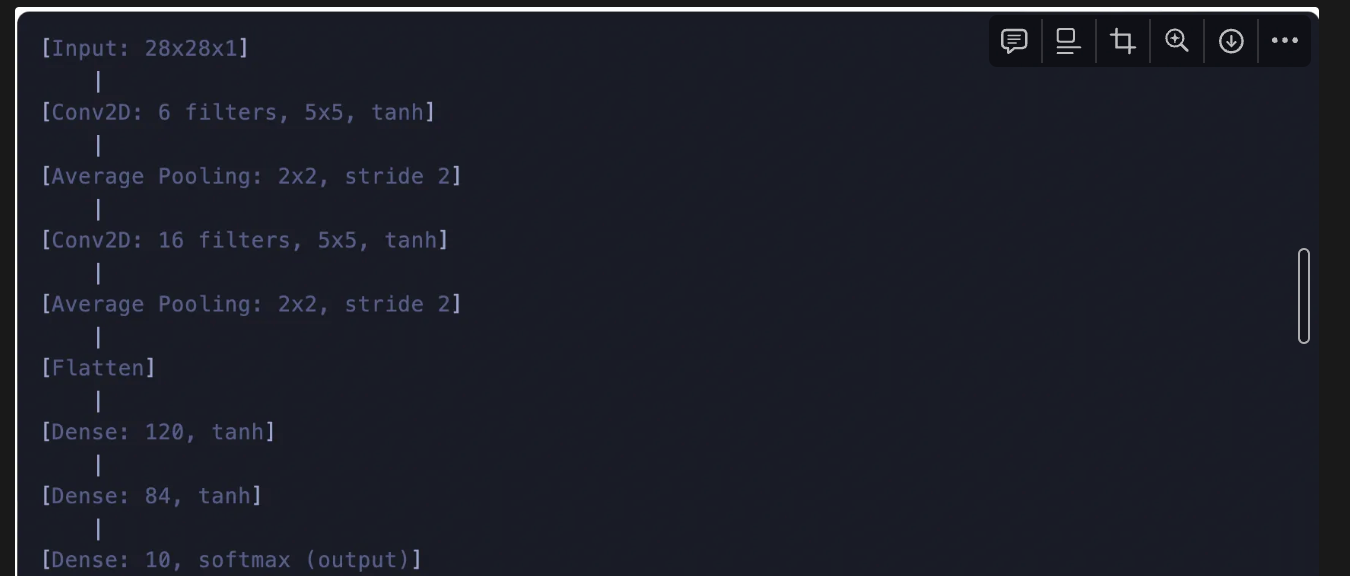

In [74]:
#lenet model with pytorch
class LeNet5(nn.Module):
    
    def __init__(self):
        super(LeNet5,self).__init__()
        #tanh act
        self.conv1 = nn.Conv2d(1,6,5,1)
        self.conv2 = nn.Conv2d(6,16,5,1)
        self.fc1 = nn.Linear(256,36)
        self.fc2 = nn.Linear(36,10)
    def forward(self,x):
        #pass conv1 through tanh and avg pooling
        x = F.tanh(self.conv1(x))
        x = F.avg_pool2d(x,2,2)
        x = F.tanh(self.conv2(x))
        x = F.avg_pool2d(x,2,2)
        x = x.view(-1,256)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

In [75]:
lenet = LeNet5().to(device)

In [76]:
num_epochs = 20
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(),lr = 0.01)

In [77]:
for epoch in range(num_epochs):
    for X_train,y_train in train_loader:
        X_train,y_train = X_train.to(device),y_train.to(device)
        y_pred = lenet(X_train)
        loss = criterion(y_pred,y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch : {epoch+1} loss : {loss.item()}")

epoch : 1 loss : 0.0607864111661911
epoch : 2 loss : 0.013653755187988281
epoch : 3 loss : 0.023401334881782532
epoch : 4 loss : 0.4214346408843994
epoch : 5 loss : 0.26397275924682617
epoch : 6 loss : 0.3181677460670471
epoch : 7 loss : 0.030733346939086914
epoch : 8 loss : 0.23011045157909393
epoch : 9 loss : 0.003296051174402237
epoch : 10 loss : 0.03133638575673103
epoch : 11 loss : 0.1282474845647812
epoch : 12 loss : 0.02337292768061161
epoch : 13 loss : 0.005902993492782116
epoch : 14 loss : 0.4292137920856476
epoch : 15 loss : 0.6252199411392212
epoch : 16 loss : 0.01747923344373703
epoch : 17 loss : 0.012187025509774685
epoch : 18 loss : 0.15595954656600952
epoch : 19 loss : 0.20019587874412537
epoch : 20 loss : 0.001740377745591104


In [78]:
all_preds = []
all_labels = []
lenet.eval()
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test,y_test = X_test.to(device),y_test.to(device)
        pred = lenet(X_test)
        pred = torch.argmax(pred, dim=1)
        
        # Collect predictions and labels
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(y_test.cpu().numpy())
print(classification_report(all_preds,all_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.98      0.98      1138
           2       0.97      0.97      0.97      1026
           3       0.97      0.94      0.96      1043
           4       0.95      0.97      0.96       962
           5       0.96      0.96      0.96       887
           6       0.96      0.99      0.97       930
           7       0.96      0.96      0.96      1034
           8       0.95      0.96      0.96       971
           9       0.95      0.94      0.95      1029

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

